<a href="https://colab.research.google.com/github/DanielleRodriguez/Danielle_Projects/blob/main/DanyExam2Question2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2a)**

The following data is the census count of the population (in millions) for England and
Wales at every decade from 1801 to 1931:

Year = [1801, 1811, 1821, 1831, 1841, 1851, 1861, 1871, 1881, 1891, 1901, 1911, 1921,
1931]

Population Size = [8.89, 10.16, 12.00, 13.90, 15.91, 17.93, 20.07, 22.71, 25.97, 29.00,
32.53, 36.07, 37.89, 39.95]

Create a scatter plot of this data. Compute the covariance and the correlation
coefficient of the year and population size. What does the correlation coefficient imply
about the data? Treat this data set as a sample

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


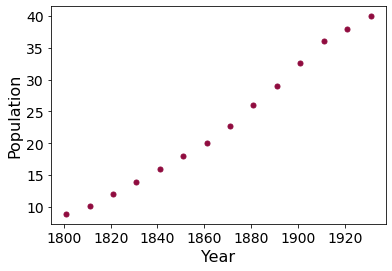

Covariance: 441.56153846153853
Correlation coefficient: 0.9933610658516092


In [ ]:
# pledge, Dany Rodriguez

#Scatter Plot

%reset
import numpy as np
import matplotlib.pyplot as plt

x_year = np.array([1801, 1811, 1821, 1831, 1841, 1851, 1861, 1871, 1881, 1891, 1901, 1911, 1921, 1931])
y_pop = np.array([8.89, 10.16, 12.00, 13.90, 15.91, 17.93, 20.07, 22.71, 25.97, 29.00, 32.53, 36.07, 37.89, 39.95])

plt.scatter(x_year,y_pop,s=25,c="#900C3F")
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#Covariance

def covariance(x_year,y_pop):
  number_of_points = len(x_year)
  mean_x = np.mean(x_year)
  mean_y = np.mean(y_pop)
  denom = number_of_points - 1
  cov = np.sum((x_year - mean_x)*(y_pop - mean_y))/denom
  return cov

print('Covariance:',covariance(x_year,y_pop))

#Correlation coefficient

def correlation(x_year,y_pop,cov):
  number_of_points = len(x_year)
  denom = number_of_points - 1
  mean_x = np.mean(x_year)
  mean_y = np.mean(y_pop)  
  var_x = np.sum((x_year - mean_x)**2)/denom
  var_y = np.sum((y_pop - mean_y)**2)/denom
  std_x = np.sqrt(var_x)
  std_y = np.sqrt(var_y)
  cor_coef = cov/(std_x*std_y)
  return cor_coef

cov = covariance(x_year,y_pop)
print('Correlation coefficient:',correlation(x_year,y_pop,cov))


The correlation coefficient, 0.993, implies that there is a strong positive linear relationship between the x and y variables. As x increases, y will increase.   



**2b)**

Fit a line f(x) = ax + b to this data using “lsq linear”. Plot this line on the graph
with the data. Compute R2 and interpret its meaning. Plot the residuals and interpret
what the plot tells us about the model.

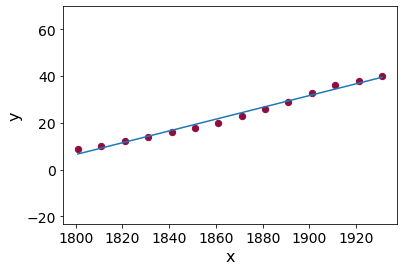

Squared error for the model regression:  19.424857582417633
R-squared or Coefficient of Determination:  0.9867662071498449


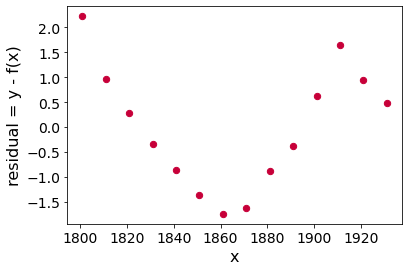

In [ ]:
number_of_points=np.shape(x_year)[0]
xt = x_year.reshape((-1, 1))

#or use SciPy
from scipy.optimize import lsq_linear

o = np.ones((number_of_points, 1))
#print(o)
#print(x)
#print(xt)
matrix = np.concatenate((xt, o), axis=1)
#print(matrix)
res = lsq_linear(matrix, y_pop)
#print(res)

import matplotlib.pyplot as plt
from matplotlib import cm
a = res.x[0]
b = res.x[1]

xp = np.linspace(np.min(x_year) - 0.1, np.max(x_year) + 0.1, 100)
yp = a*xp + b
plt.scatter(x_year,y_pop,s=40,c="#900C3F")
plt.plot(xp,yp)
y_mean = np.mean(y_pop)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('equal')
plt.show()



#R^2
x = x_year.reshape((number_of_points,1))
#print(x)

fx = a*x_year + b
r = y_pop - fx

def R2(number_of_points,r,y):
  y_mean = np.sum(y_pop)/number_of_points
  SE_mean = sum((y_pop - y_mean)**2)
  SE = sum(r**2)
  R2 = 1 - SE/SE_mean
  return SE,R2
res1 = R2(number_of_points,r,y_pop)
print('Squared error for the model regression: ', res1[0])
print('R-squared or Coefficient of Determination: ', res1[1]) 

#residuals

plt.scatter(x_year,r,s=40,c="#C70039")
plt.xlabel('x', fontsize=16)
plt.ylabel('residual = y - f(x)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The R^2 is .987 which means that there is 98.7% less variation around the line than the mean. Essentially, the x and y relationship accounts fot 98.7% of the variation.

When looking at the residual plot, it is clear that there seems to be a pattern meaning that a nonlinear model is more appropriate for this dataset. 



**2c)** 

Fit an exponential function f(x) = aebx to this data using “curve fit”. Plot this
curve on the graph with the data. Compute R2 and interpret its meaning. Plot the
residuals and interpret what the plot tells us about the model.

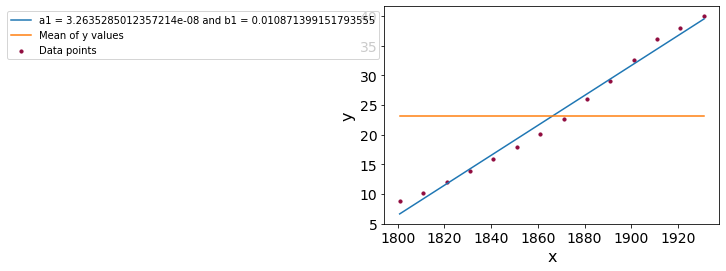

Squared error for the model regression:  19.424857582417633
R-squared or Coefficient of Determination:  0.9867662071498449


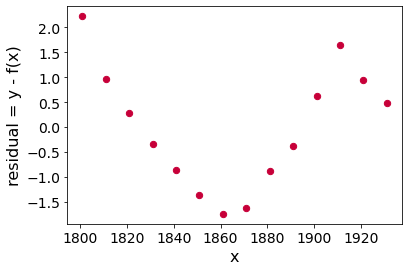

In [ ]:
from scipy.optimize import curve_fit

def func(x,a1,b1):
  return a1*np.exp(b1*x_year)

ini_para = np.array([1, 0])
fitParams, pcov = curve_fit(func, x_year, y_pop, p0=ini_para, method='lm', maxfev=10000)

a1 = fitParams[0]
b1 = fitParams[1]
xp1 = np.linspace(np.min(x) - 0.1, np.max(x) + 0.1, 100)
yp1 = a1*np.exp(b1*xp1) 
plt.scatter(x,y_pop,s=10,c="#900C3F", label='Data points')
plt.plot(xp,yp, label='a1 = '+str(a1)+' and b1 = '+str(b1))
y_mean = np.mean(y_pop)
plt.plot([np.min(xp), np.max(xp)],[y_mean, y_mean], label='Mean of y values')
plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()
#print(x)

#R^2


fx1 = a1*np.exp(b1*x_year)
r1 = y_pop - fx

def R2(number_of_points,r,y):
  y_mean = np.sum(y_pop)/number_of_points
  SE_mean = sum((y_pop - y_mean)**2)
  SE = sum(r1**2)
  R2 = 1 - SE/SE_mean
  return SE,R2
res = R2(number_of_points,r1,y_pop)
print('Squared error for the model regression: ', res1[0])
print('R-squared or Coefficient of Determination: ', res1[1]) 

#residuals

plt.scatter(x,r,s=40,c="#C70039")
plt.xlabel('x', fontsize=16)
plt.ylabel('residual = y - f(x)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
 

The R^2 is .985 which means that there is 98.5% less variation around the line than the mean. Essentially, the x and y relationship accounts fot 98.5% of the variation.

When looking at the residual plot, it is clear that there seems to be a pattern meaning that a nonlinear model is more appropriate for this dataset. 

**2d)**

Fit an exponential function f(x) = ae^(bx) to this data by taking the logarithm of
the population size. Then fit a line to the transformed data using “lsq linear”. Plot
the resulting exponential function on the graph with the original population data.
Compute R2 and interpret 

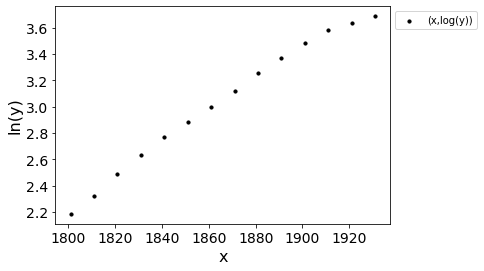

 active_mask: array([0., 0.])
        cost: 0.01732505172538829
         fun: array([ 0.07138438,  0.05677006,  0.00923893, -0.01882619, -0.03496812,
       -0.03557849, -0.0294123 , -0.03407442, -0.04929402, -0.04073075,
       -0.03668059, -0.02106227,  0.04862907,  0.1146047 ])
     message: 'The unconstrained solution is optimal.'
         nit: 0
  optimality: 1.1732481652870774e-10
      status: 3
     success: True
           x: array([ 1.18917072e-02, -1.91606533e+01])


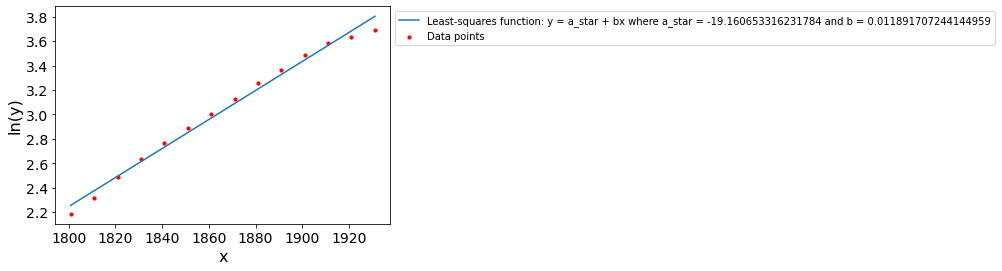

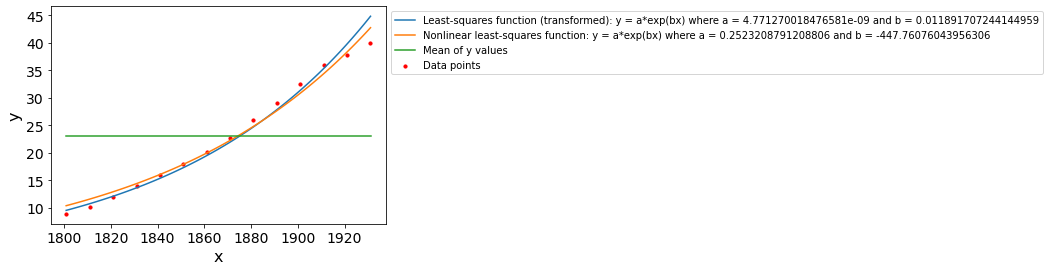

Squared error for the model regression:  19.424857582417633
R-squared or Coefficient of Determination:  0.9867662071498449


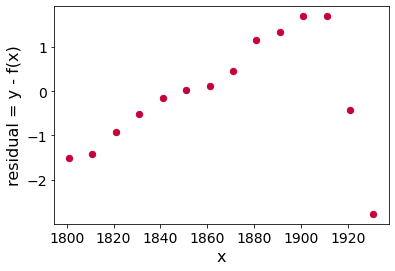

In [ ]:
a2 = fitParams[0]
b2 = fitParams[1]
xp2 = np.linspace(np.min(x) - 0.1, np.max(x) + 0.1, 100)
yp2 = a2*np.exp(b2*xp) 
#plt.scatter(x,y_pop,s=10,c="#900C3F", label='Data points')
plt.scatter(x,np.log(y_pop),s=10,c="black", label='(x,log(y))')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('ln(y)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

#transformed data (x, log(y))
y_star = np.log(y_pop)
#use SciPy
from scipy.optimize import lsq_linear

o = np.ones((number_of_points,1))
matrix = np.concatenate((x, o), axis=1)
#print(matrix)

# lsq_linear tries to minimize 0.5 * ||A x - b||**2 
res = lsq_linear(matrix, y_star)
print(res)
bb = res.x[0]
a_star = res.x[1]
aa = np.exp(a_star)

yp_star = a_star + bb*xp
plt.scatter(x,y_star,s=10,c="red", label='Data points')
plt.plot(xp,yp_star, label='Least-squares function: y = a_star + bx where a_star = '+str(a_star)+' and b = '+str(bb))
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('ln(y)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

ypp2 = aa*np.exp(bb*xp2) 
plt.scatter(x_year,y_pop,s=10,c="red", label='Data points')
plt.plot(xp2,ypp2, label='Least-squares function (transformed): y = a*exp(bx) where a = '+str(aa)+' and b = '+str(bb))
plt.plot(xp2,yp2, label='Nonlinear least-squares function: y = a*exp(bx) where a = '+str(a)+' and b = '+str(b))
y_mean = np.mean(y_pop)
plt.plot([np.min(xp), np.max(xp)],[y_mean, y_mean], label='Mean of y values')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

#R^2

fx2 = a2*np.exp(b2*x_year)
r2 = y_pop - fx2

def R2(number_of_points,r2,y):
  y_mean = np.sum(y_pop)/number_of_points
  SE_mean = sum((y_pop - y_mean)**2)
  SE = sum(r1**2)
  R2 = 1 - SE/SE_mean
  return SE,R2
res2 = R2(number_of_points,r1,y_pop)
print('Squared error for the model regression: ', res2[0])
print('R-squared or Coefficient of Determination: ', res2[1]) 

#residuals

plt.scatter(x,r2,s=40,c="#C70039")
plt.xlabel('x', fontsize=16)
plt.ylabel('residual = y - f(x)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
 

The R^2 is .987 which means that there is 98.7% less variation around the line than the mean. Essentially, the x and y relationship accounts fot 98.7% of the variation.

When looking at the residual plot, it is clear that there seems to be a pattern meaning that a nonlinear model as opposed to a linear model is more appropriate for this dataset. 

**2e**
 Fit a power function f(x) = axb
to this data using “curve fit”. Plot this curve on
the graph with the data. Compute R2 and interpret its meaning. Plot the residuals
and interpret what the plot tells us about the model.

[2.67601505e-66 2.04523176e+01]


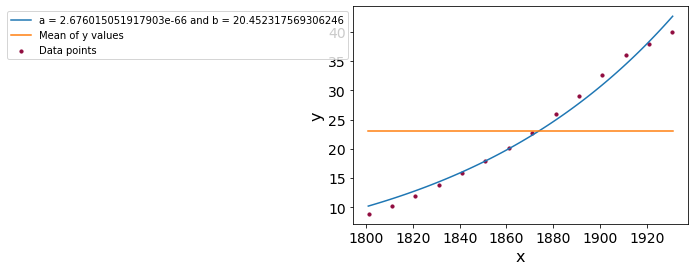

Squared error for the model regression:  19.71775813277741
R-squared or Coefficient of Determination:  0.9865666594727145


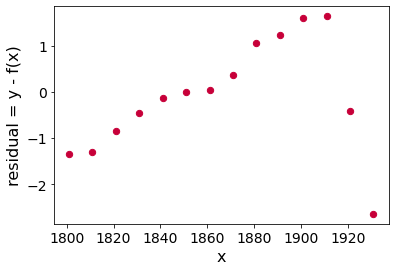

In [ ]:
def func(x,a3,b3):
  return a3*(x_year**b3)

ini_para = np.array([1, 0])
fitParams, pcov = curve_fit(func, x_year, y_pop, p0=ini_para, method='lm', maxfev=10000)
print(fitParams)

a3 = fitParams[0]
b3 = fitParams[1]
xp3 = np.linspace(np.min(x) - 0.1, np.max(x) + 0.1, 100)
yp3 = a3*(xp3**b3)
plt.scatter(x,y_pop,s=10,c="#900C3F", label='Data points')
plt.plot(xp3,yp3, label='a = '+str(a3)+' and b = '+str(b3))
y_mean = np.mean(y_pop)
plt.plot([np.min(xp3), np.max(xp3)],[y_mean, y_mean], label='Mean of y values')
plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()
#print(x)

#R^2

fx3 = a3*(x_year**b3)
r3 = y_pop - fx3

def R2(number_of_points,r3,y_pop):
  y_mean = np.sum(y_pop)/number_of_points
  SE_mean = sum((y_pop - y_mean)**2)
  SE = sum(r3**2)
  R2 = 1 - SE/SE_mean
  return SE,R2
res3 = R2(number_of_points,r3,y_pop)
print('Squared error for the model regression: ', res3[0])
print('R-squared or Coefficient of Determination: ', res3[1]) 

#residuals

plt.scatter(x,r3,s=40,c="#C70039")
plt.xlabel('x', fontsize=16)
plt.ylabel('residual = y - f(x)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
 

The R^2 is .987 which means that there is 98.7% less variation around the line than the mean. Essentially, the x and y relationship accounts fot 98.7% of the variation.

When looking at the residual plot, it is clear that there seems to be a pattern meaning that a nonlinear model is more appropriate for this dataset. 

**2f)** Fit a power function f(x) = axb
to this data by taking the logarithms of both the
year and population size. Then fit a line to the transformed data using “lsq linear”.
Plot the resulting power function on the graph with the original population data.
Compute R2 and interpret its meaning. Plot the residuals and interpret what the plot
tells us about the model.

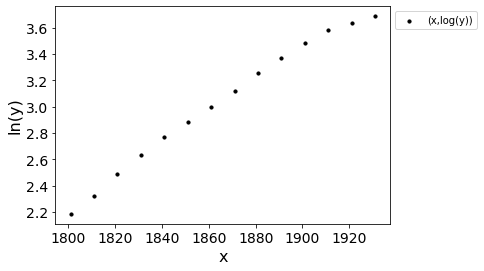

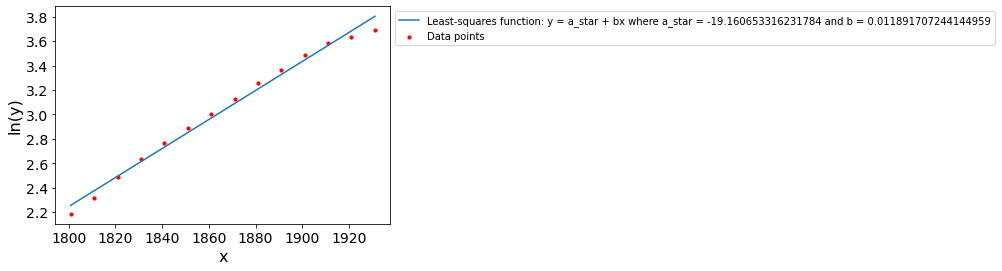

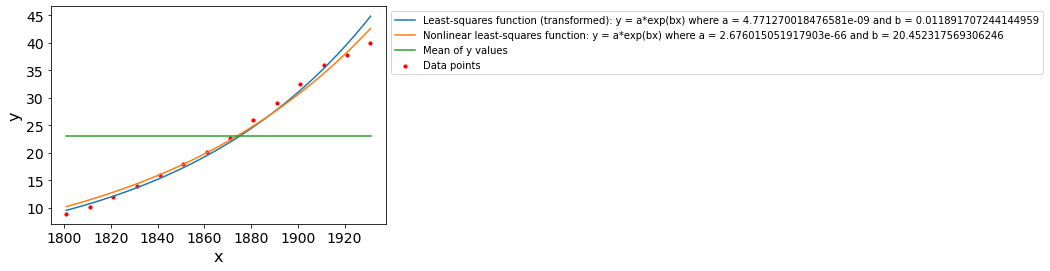

Squared error for the model regression:  19.71775813277741
R-squared or Coefficient of Determination:  0.9865666594727145


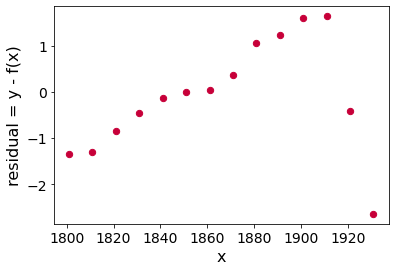

In [ ]:
a4 = fitParams[0]
b4 = fitParams[1]
xp4 = np.linspace(np.min(x) - 0.1, np.max(x) + 0.1, 100)
yp4 = a4*(xp4**b4)
#plt.scatter(x,y_pop,s=10,c="#900C3F", label='Data points')
plt.scatter(x,np.log(y_pop),s=10,c="black", label='(x,log(y))')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('ln(y)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

#transformed data (x, log(y))
y_star4 = np.log(y_pop)
#use SciPy
from scipy.optimize import lsq_linear

o = np.ones((number_of_points,1))
matrix = np.concatenate((x, o), axis=1)
#print(matrix)

# lsq_linear tries to minimize 0.5 * ||A x - b||**2 
res = lsq_linear(matrix, y_star)
#print(res)
bb4 = res.x[0]
a_star4 = res.x[1]
aa4 = np.exp(a_star4)

yp_star4 = a_star4 + bb4*xp4
plt.scatter(x,y_star4,s=10,c="red", label='Data points')
plt.plot(xp4,yp_star4, label='Least-squares function: y = a_star + bx where a_star = '+str(a_star)+' and b = '+str(bb))
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('ln(y)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

ypp4 = aa4*np.exp(bb4*xp4) 
plt.scatter(x_year,y_pop,s=10,c="red", label='Data points')
plt.plot(xp4,ypp4, label='Least-squares function (transformed): y = a*exp(bx) where a = '+str(aa4)+' and b = '+str(bb4))
plt.plot(xp4,yp4, label='Nonlinear least-squares function: y = a*exp(bx) where a = '+str(a4)+' and b = '+str(b4))
y_mean = np.mean(y_pop)
plt.plot([np.min(xp4), np.max(xp4)],[y_mean, y_mean], label='Mean of y values')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

#R^2

fx4 = a4*(x_year**b4)
r4 = y_pop - fx4

def RR2(number_of_points,r4,y):
  y_mean4 = np.sum(y_pop)/number_of_points
  SE_mean4 = sum((y_pop - y_mean)**2)
  SE4 = sum(r4**2)
  RR2 = 1 - SE4/SE_mean4
  return SE4,RR2
res4 = RR2(number_of_points,r4,y_pop)
print('Squared error for the model regression: ', res4[0])
print('R-squared or Coefficient of Determination: ', res4[1]) 

#residuals

plt.scatter(x,r4,s=40,c="#C70039")
plt.xlabel('x', fontsize=16)
plt.ylabel('residual = y - f(x)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The R^2 is .987 which means that there is 98.7% less variation around the line than the mean. Essentially, the x and y relationship accounts fot 98.7% of the variation.

When looking at the residual plot, it is clear that there seems to be a pattern meaning that a nonlinear model is more appropriate for this dataset. 

**2g)**

Find the Lagrange interpolating polynomial of the population data. Explain what
you see from the resulting coefficients and the plot of the Lagrange polynomial and the
data points.

            13             12             11             10
-3.823e-21 x  + 9.265e-17 x  - 1.036e-12 x  + 7.085e-09 x 
              9          8         7             6             5
 - 3.302e-05 x + 0.1108 x - 275.3 x + 5.132e+05 x - 7.174e+08 x
              4             3             2
 + 7.429e+11 x - 5.538e+14 x + 2.815e+17 x - 8.743e+19 x + 1.253e+22


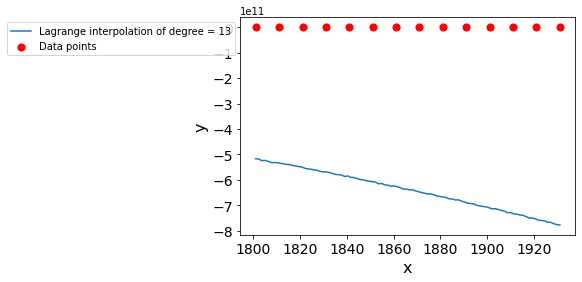

In [ ]:
from scipy.interpolate import lagrange
poly = lagrange(x_year, y_pop)
print(poly)

xp5 = np.linspace(np.min(x) - 0.1, np.max(x) + 0.1, 100)
yp5 = poly(xp) 
#yp = poly(x)

plt.scatter(x_year,y_pop,s=50,c="red", label='Data points')
plt.plot(xp5,yp5, label='Lagrange interpolation of degree = '+str(len(x)-1))

plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

When looking at the resulting coefficients and the plot of the Lagrange polymonial and the data points, it seems like this method may not be very useful for the dataset at hand; when it comes to Lagrange interpolation if the dataset is too large, it will not work because there will be too much oscillation in the model.

**h)** Plot all these models on the same graph with the data. Which is the best model?
Justify your answer.

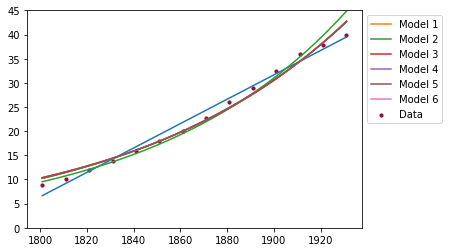

In [ ]:
xp = np.linspace(np.min(x_year) - 0.1, np.max(x_year) + 0.1, 100000)
yp = a*xp + b
plt.scatter(x_year,y_pop,s=10,c="#900C3F", label = 'Data')
plt.plot(xp,yp)


plt.plot(xp1,yp1, label='Model 1')
plt.plot(xp2,ypp2, label= 'Model 2')
plt.plot(xp2,yp2, label='Model 3')
plt.plot(xp3,yp3, label='Model 4')
plt.plot(xp4,yp4, label='Model 5')
plt.plot(xp5,yp5, label='Model 6')
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)

ymin, ymax = plt. ylim(0,45)
#xmin, xmax = plt. xlim(2000,2020)



I think the best model would be model 2 because it seems to fit the data the best. 